# 데이터셋 파일 import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
mov_meta = pd.read_csv("movie_meta.csv", engine='python', encoding="cp949")
mov_invent = pd.read_csv("movie_inventory.csv", engine='python', encoding="cp949")
mov_cust = pd.read_csv("movie_customer.csv", engine='python', encoding="cp949")
mov_down = pd.read_csv("movie_down.csv", engine='python', encoding="cp949")

In [ ]:
mov_meta.isna().sum()

movie_id                0
title                   0
release_year            0
release_date            0
runtime                 0
mpa_rating              0
mpa_rating_origin       0
imdb_score              0
votes                   0
reviews_users           0
reviews_critics         0
budget                  0
income_usa              0
income_ww               0
theater_opening         0
theater_total           0
country_1               0
country_2             964
country_3            1366
studio                  1
director                0
Genre_1                 0
Genre_2                99
Genre_3               461
Genre_4              1048
Genre_5              1415
Genre_6              1582
Genre_7              1655
Genre_8              1666
awards                 75
contract_price          0
studio_score            0
price_class             0
writer_1                0
writer_2              410
actor_1                 0
actor_2                 0
actor_3                 0
description 

In [ ]:
mov_invent.isna().sum()

item_id               0
contract_year         0
movie_id              0
title                 0
release_year          0
release_date          0
runtime               0
mpa_rating            0
mpa_rating_origin     0
imdb_score            0
votes                 0
reviews_users         0
reviews_critics       0
budget                0
income_usa            0
income_ww             0
theater_opening       0
theater_total         0
country_1             0
country_2            67
country_3            92
studio                0
director              0
Genre_1               0
Genre_2               3
Genre_3              10
actor_1               0
actor_2               0
actor_3               0
contract_price        0
studio_score          0
price_class           0
dtype: int64

In [ ]:
mov_cust.isna().sum()

customer_id        0
gender             0
age                0
age_group          0
married            0
kids_under12       0
area               0
subs_start_year    0
dtype: int64

In [ ]:
mov_down.isna().sum()

customer_id     0
item_id         0
down_date       0
down_year       0
down_month      0
down_weekday    0
dtype: int64

# 데이터 병합

In [ ]:
mov_custdown = pd.merge(mov_cust, mov_down, how='outer')

In [ ]:
mov_custdowninvet = pd.merge(mov_custdown, mov_invent, on='item_id')

In [ ]:
mov_all = pd.merge(mov_custdowninvet, mov_meta, on='movie_id')

In [ ]:
mov_moviedown = pd.merge(mov_down, mov_invent, how='left')

In [ ]:
mov_moviedown.to_csv('fixeddata.csv', header= False, index= False)

# groupby로 특성 파악

In [ ]:
grpmov1 = mov_invent.groupby(by=['Genre_1', 'Genre_2'], as_index=False).mean()

In [ ]:
grpmov2 = mov_invent.groupby(by=['studio_score'], as_index=False).mean()

# 그래프 탐색

In [ ]:
def fun_plot_hist(data, var):
    plt.hist(data[data["SCALE"] == "양품"][var], label = "양품", alpha = 0.5)
    plt.hist(data[data["SCALE"] == "불량"][var], label = "불량", alpha = 0.5)
    plt.legend()

In [ ]:
def fun_print_crosstab(data, var):
    print(pd.crosstab(index=data["SCALE"], columns=data[var]))
    print()
    print(pd.crosstab(index=data["SCALE"], columns=data[var], normalize = "columns").round(3))

Text(0.5, 1.0, '고객 성비')

/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44061 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeW

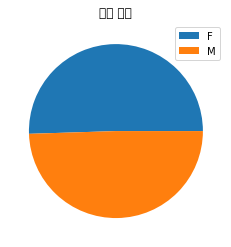

In [ ]:
plt.pie(list(mov_cust["gender"].value_counts()))
categories = list(mov_cust["gender"].value_counts().index)
plt.legend(categories, loc='upper right')
plt.title("고객 성비")

Text(0.5, 1.0, '고객 거주지')

/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWar

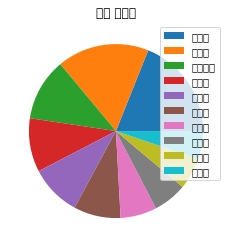

In [ ]:
plt.pie(list(mov_cust["area"].value_counts()))
categories = list(mov_cust["area"].value_counts().index)
plt.legend(categories, loc='upper right')
plt.title("고객 거주지")

Text(0.5, 1.0, '고객 결혼여부')

/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54844 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeW

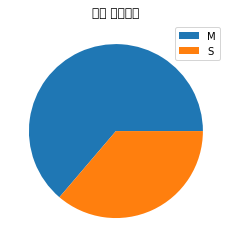

In [ ]:
plt.pie(list(mov_cust["married"].value_counts()))
categories = list(mov_cust["married"].value_counts().index)
plt.legend(categories, loc='upper right')
plt.title("고객 결혼여부")

Text(0.5, 1.0, '고객 12살 이하 아이 여부')

/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49332 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49332 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeW

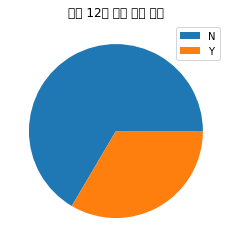

In [ ]:
plt.pie(list(mov_cust["kids_under12"].value_counts()))
categories = list(mov_cust["kids_under12"].value_counts().index)
plt.legend(categories, loc='upper right')
plt.title("고객 12살 이하 아이 여부")

Text(0.5, 1.0, '고객 나이대')

/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0, flags=flags)


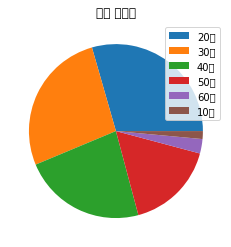

In [ ]:
plt.pie(list(mov_cust["age_group"].value_counts()))
categories = list(mov_cust["age_group"].value_counts().index)
plt.legend(categories, loc='upper right')
plt.title("고객 나이대")

In [ ]:
a = mov_down.groupby("item_id").count()

Text(0.5, 1.0, '영화별 다운로드 수')

/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: Runtim

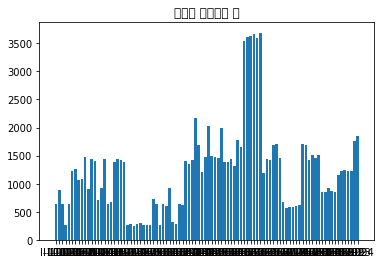

In [ ]:
plt.bar(list(a["customer_id"].index), list(a["customer_id"].values))
plt.title("영화별 다운로드 수")

In [ ]:
b = mov_down.groupby("down_month").count()

Text(0.5, 1.0, '월별 전체 다운로드 수')

/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: Runtim

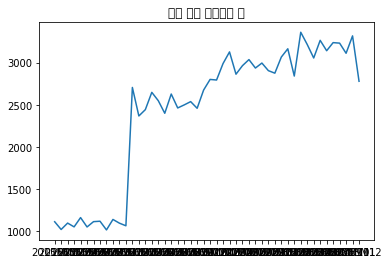

In [ ]:
plt.plot(list(b["customer_id"].index), list(b["customer_id"].values))
plt.title("월별 전체 다운로드 수")

In [ ]:
c = mov_down.groupby("down_weekday").count()

Text(0.5, 1.0, '요일별 다운로드 수')

/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)


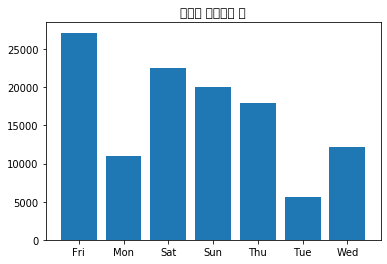

In [ ]:
plt.bar(list(c["customer_id"].index), list(c["customer_id"].values))
plt.title("요일별 다운로드 수")

# 고객별 다운로드 아이템 파악

In [ ]:
cormethod = mov_down[["customer_id","item_id"]]
cormethod

,customer_id,item_id
0,C5001,I-1038
1,C5001,I-1003
2,C5001,I-1017
3,C5001,I-1028
4,C5001,I-1036
...,...,...
116459,C8277,I-1087
116460,C8277,I-1090
116461,C8277,I-1088
116462,C8277,I-1091


In [ ]:
tmp = pd.DataFrame()

In [ ]:
lst = list(cormethod['customer_id'].unique())

In [ ]:
# cormethod[cormethod['customer_id']=='C5977']['item_id'].tolist()

In [ ]:
cust_rawdict = dict()
cust_setdict = dict()
for i in lst:
    cust_rawdict[i] = cormethod[cormethod['customer_id'] == i ]['item_id'].tolist()
    cust_setdict[i] = list(set(cormethod[cormethod['customer_id'] == i ]['item_id'].tolist()))
cust_setdict

{'C5001': ['I-1010',
  'I-1028',
  'I-1049',
  'I-1086',
  'I-1036',
  'I-1003',
  'I-1038',
  'I-1093',
  'I-1035',
  'I-1077',
  'I-1045',
  'I-1092',
  'I-1047',
  'I-1018',
  'I-1015',
  'I-1085',
  'I-1053',
  'I-1006',
  'I-1080',
  'I-1014',
  'I-1039',
  'I-1056',
  'I-1067',
  'I-1017',
  'I-1042',
  'I-1043',
  'I-1031',
  'I-1071',
  'I-1081',
  'I-1002',
  'I-1041',
  'I-1088',
  'I-1037',
  'I-1079',
  'I-1076',
  'I-1052',
  'I-1055',
  'I-1061',
  'I-1046',
  'I-1065'],
 'C5002': ['I-1043',
  'I-1094',
  'I-1057',
  'I-1080',
  'I-1049',
  'I-1044',
  'I-1052',
  'I-1055',
  'I-1092',
  'I-1066',
  'I-1003',
  'I-1088',
  'I-1041',
  'I-1005',
  'I-1068',
  'I-1077',
  'I-1045'],
 'C5003': ['I-1078',
  'I-1057',
  'I-1007',
  'I-1059',
  'I-1072',
  'I-1050',
  'I-1086',
  'I-1036',
  'I-1083',
  'I-1038',
  'I-1093',
  'I-1054',
  'I-1045',
  'I-1018',
  'I-1015',
  'I-1032',
  'I-1053',
  'I-1080',
  'I-1039',
  'I-1056',
  'I-1013',
  'I-1066',
  'I-1011',
  'I-1042',

In [ ]:
result = list(cust_setdict.values())
result

[['I-1010',
  'I-1028',
  'I-1049',
  'I-1086',
  'I-1036',
  'I-1003',
  'I-1038',
  'I-1093',
  'I-1035',
  'I-1077',
  'I-1045',
  'I-1092',
  'I-1047',
  'I-1018',
  'I-1015',
  'I-1085',
  'I-1053',
  'I-1006',
  'I-1080',
  'I-1014',
  'I-1039',
  'I-1056',
  'I-1067',
  'I-1017',
  'I-1042',
  'I-1043',
  'I-1031',
  'I-1071',
  'I-1081',
  'I-1002',
  'I-1041',
  'I-1088',
  'I-1037',
  'I-1079',
  'I-1076',
  'I-1052',
  'I-1055',
  'I-1061',
  'I-1046',
  'I-1065'],
 ['I-1043',
  'I-1094',
  'I-1057',
  'I-1080',
  'I-1049',
  'I-1044',
  'I-1052',
  'I-1055',
  'I-1092',
  'I-1066',
  'I-1003',
  'I-1088',
  'I-1041',
  'I-1005',
  'I-1068',
  'I-1077',
  'I-1045'],
 ['I-1078',
  'I-1057',
  'I-1007',
  'I-1059',
  'I-1072',
  'I-1050',
  'I-1086',
  'I-1036',
  'I-1083',
  'I-1038',
  'I-1093',
  'I-1054',
  'I-1045',
  'I-1018',
  'I-1015',
  'I-1032',
  'I-1053',
  'I-1080',
  'I-1039',
  'I-1056',
  'I-1013',
  'I-1066',
  'I-1011',
  'I-1042',
  'I-1051',
  'I-1043',
  

# 연관규칙

In [ ]:
import pandas as pd

import numpy as np

from mlxtend.preprocessing import TransactionEncoder

from mlxtend.frequent_patterns import apriori

from mlxtend.frequent_patterns import association_rules


In [ ]:
df_raw = result

In [ ]:
enc = TransactionEncoder()

df_raw_enc = enc.fit_transform(X = df_raw)

df_asso = pd.DataFrame(df_raw_enc, columns = enc.columns_)
df_asso.head()

,I-1001,I-1002,I-1003,I-1004,I-1005,I-1006,I-1007,I-1008,I-1009,I-1010,...,I-1085,I-1086,I-1087,I-1088,I-1089,I-1090,I-1091,I-1092,I-1093,I-1094
0,False,True,True,False,False,True,False,False,False,True,...,True,True,False,True,False,False,False,True,True,False
1,False,False,True,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
2,False,False,False,True,True,False,True,False,True,False,...,False,True,False,False,False,False,True,False,True,False
3,False,False,True,True,True,True,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
4,True,True,True,True,False,True,False,False,False,False,...,True,False,False,True,False,False,True,False,True,True


In [ ]:
v_min_sup = 0.1

df_freq = apriori(df_asso, min_support = v_min_sup, use_colnames=True)
df_freq.round(3)

,support,itemsets
0,0.166,(I-1001)
1,0.209,(I-1002)
2,0.164,(I-1003)
3,0.154,(I-1005)
4,0.254,(I-1006)
...,...,...
3016,0.102,"(I-1059, I-1062, I-1063, I-1061, I-1064, I-107..."
3017,0.106,"(I-1078, I-1059, I-1062, I-1063, I-1061, I-106..."
3018,0.103,"(I-1059, I-1062, I-1063, I-1061, I-1020, I-106..."
3019,0.102,"(I-1059, I-1062, I-1063, I-1022, I-1061, I-102..."


In [ ]:
df_asso_rule = association_rules(df_freq, metric="confidence", min_threshold=0.5)

df_asso_rule.round(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(I-1006),(I-1010),0.254,0.287,0.136,0.535,1.869,0.063,1.536
1,(I-1006),(I-1013),0.254,0.284,0.132,0.519,1.828,0.060,1.488
2,(I-1006),(I-1016),0.254,0.291,0.131,0.517,1.777,0.057,1.469
3,(I-1006),(I-1044),0.254,0.361,0.147,0.579,1.603,0.055,1.517
4,(I-1006),(I-1045),0.254,0.333,0.128,0.507,1.520,0.044,1.351
...,...,...,...,...,...,...,...,...,...
25155,"(I-1060, I-1022)","(I-1059, I-1062, I-1063, I-1061, I-1064, I-1021)",0.171,0.140,0.102,0.596,4.246,0.078,2.128
25156,"(I-1022, I-1021)","(I-1059, I-1062, I-1063, I-1061, I-1064, I-1060)",0.132,0.211,0.102,0.775,3.683,0.074,3.516
25157,"(I-1021, I-1061)","(I-1059, I-1062, I-1063, I-1022, I-1064, I-1060)",0.175,0.135,0.102,0.586,4.323,0.079,2.086
25158,"(I-1021, I-1064)","(I-1059, I-1062, I-1063, I-1022, I-1061, I-1060)",0.175,0.135,0.102,0.585,4.344,0.079,2.084


In [ ]:
df_asso_rule.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(I-1006),(I-1010),0.253586,0.286543,0.135795,0.535499,1.868830,0.063132,1.535967
1,(I-1006),(I-1013),0.253586,0.283796,0.131523,0.518652,1.827552,0.059556,1.487913
2,(I-1006),(I-1016),0.253586,0.291120,0.131218,0.517449,1.777442,0.057394,1.469026
3,(I-1006),(I-1044),0.253586,0.361001,0.146781,0.578821,1.603377,0.055236,1.517166
4,(I-1006),(I-1045),0.253586,0.333232,0.128471,0.506619,1.520320,0.043968,1.351426


In [ ]:
df_asso_rule.sort_values(by=['lift'], axis=0).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
67,(I-1020),(I-1048),0.220323,0.425999,0.110772,0.502770,1.180213,0.016914,1.154397
853,"(I-1059, I-1062)",(I-1048),0.274641,0.425999,0.138236,0.503333,1.181535,0.021239,1.155706
76,(I-1021),(I-1048),0.220934,0.425999,0.111688,0.505525,1.186680,0.017570,1.160828
122,(I-1065),(I-1048),0.287763,0.425999,0.145560,0.505832,1.187402,0.022973,1.161551
84,(I-1022),(I-1048),0.214831,0.425999,0.108941,0.507102,1.190383,0.017423,1.164543
874,"(I-1061, I-1062)",(I-1048),0.276472,0.425999,0.140677,0.508830,1.194438,0.022900,1.168639
883,"(I-1063, I-1062)",(I-1048),0.273421,0.425999,0.139152,0.508929,1.194670,0.022675,1.168874
847,"(I-1060, I-1059)",(I-1048),0.280745,0.425999,0.143424,0.510870,1.199226,0.023827,1.173512
880,"(I-1064, I-1061)",(I-1048),0.278914,0.425999,0.142508,0.510941,1.199394,0.023691,1.173684
4406,"(I-1059, I-1064, I-1062)",(I-1052),0.244126,0.415929,0.122063,0.500000,1.202128,0.020524,1.168142


# 영화 시간에 따른 파생변수 생성

In [ ]:
mov_meta["runtime_range"] = np.where(mov_meta["runtime"] < 40, "단편", mov_meta["runtime"])
mov_meta["runtime_range"] = np.where(mov_meta["runtime"] > 80, "장편", "중편")

In [ ]:
mov_meta["runtime_range"].value_counts()

장편    1662
중편       6
Name: runtime_range, dtype: int64

In [ ]:
mov_met = mov_meta[["movie_id","description","storyline"]]

In [ ]:
mov_info = pd.merge(mov_invent, mov_met, how='left')

In [ ]:
mov_info

,item_id,contract_year,movie_id,title,release_year,release_date,runtime,mpa_rating,mpa_rating_origin,imdb_score,...,Genre_2,Genre_3,actor_1,actor_2,actor_3,contract_price,studio_score,price_class,description,storyline
0,I-1001,2015,tt0121766,Star Wars: Episode III - Revenge of the Sith,2005,05-19-2005,140,PG-13,PG-13,7.5,...,Adventure,Fantasy,Ewan McGregor,Natalie Portman,Hayden Christensen,2700,10,10,"Three years into the Clone Wars, the Jedi resc...",Nearly three years have passed since the begin...
1,I-1002,2015,tt0330373,Harry Potter and the Goblet of Fire,2005,11-18-2005,157,PG-13,PG-13,7.7,...,Family,Fantasy,Eric Sykes,Timothy Spall,David Tennant,2700,10,10,Harry Potter (Daniel Radcliffe) finds himself ...,Harry's (Daniel Radcliffe's) fourth year at Ho...
2,I-1003,2015,tt0363771,"The Chronicles of Narnia: The Lion, the Witc",2005,12-09-2005,143,PG,PG,6.9,...,Family,Fantasy,Georgie Henley,Skandar Keynes,William Moseley,2295,10,1,Four kids travel through a wardrobe to the lan...,Four children from the same family have to lea...
3,I-1004,2015,tt0383574,Pirates of the Caribbean: Dead Man's Chest,2006,07-07-2006,151,PG-13,PG-13,7.3,...,Adventure,Fantasy,Johnny Depp,Orlando Bloom,Keira Knightley,2295,10,1,Jack Sparrow races to recover the heart of Dav...,Once again we're plunged into the world of swo...
4,I-1005,2015,tt0413300,Spider-Man 3,2007,05-04-2007,139,PG-13,PG-13,6.2,...,Adventure,Sci-Fi,Tobey Maguire,Kirsten Dunst,James Franco,2295,10,1,A strange black entity from another world bond...,Peter Parker has finally managed to piece toge...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,I-1102,2019,tt5095030,Ant-Man and the Wasp,2018,07-06-2018,118,PG-13,PG-13,7.1,...,Adventure,Comedy,Paul Rudd,Evangeline Lilly,Michael Pe a,2295,10,1,As Scott Lang balances being both a superhero ...,In the aftermath of Capit o Am rica: Guerra Ci...
102,I-1103,2019,tt4912910,Mission: Impossible - Fallout,2018,07-27-2018,147,PG-13,PG-13,7.8,...,Adventure,Thriller,Tom Cruise,Henry Cavill,Ving Rhames,2700,10,10,"Ethan Hunt and his IMF team, along with some f...",Two years after Ethan Hunt had successfully ca...
103,I-1104,2019,tt1727824,Bohemian Rhapsody,2018,11-02-2018,134,PG-13,PG-13,8.0,...,Drama,Music,Rami Malek,Lucy Boynton,Gwilym Lee,2600,6,10,The story of the legendary British rock band Q...,Bohemian Rhapsody is a foot-stomping celebrati...
104,I-1105,2019,tt5848272,Ralph Breaks the Internet,2018,11-21-2018,112,PG,PG,7.1,...,Adventure,Comedy,John C. Reilly,Sarah Silverman,Gal Gadot,2295,10,1,"Six years after the events of ""Wreck-It Ralph,...",Taking place six years after saving the arcade...


# down에서 본 영화 데이터를 통해 새로운 파생변수 선정(구독 개월 수, 다운 영화 정보, 수)

In [ ]:
month_down = list(mov_down["down_month"].unique())
# month_down

In [ ]:
custmon_setdict = dict()
custmov_dict = dict()
custmov1_dict = dict()
for i in lst:
    custmon_setdict[i] = sorted(list(set(mov_down[mov_down['customer_id'] == i ]['down_month'].tolist())))
    custmov_dict[i] = list(mov_down[mov_down['customer_id'] == i ]['item_id'].tolist())
    custmov1_dict[i] = sorted(list(set(mov_down[mov_down['customer_id'] == i ]['item_id'].tolist())))

# custmon_setdict
# custmov_dict

In [ ]:
customer_subscribe = pd.DataFrame({ key:pd.Series(value) for key, value in custmon_setdict.items() })
custmov_data = pd.DataFrame({ key:pd.Series(value) for key, value in custmov_dict.items() })
custmov1_data = pd.DataFrame({ key:pd.Series(value) for key, value in custmov1_dict.items() })

# customer_subscribe.head()
# custmov_data.head()

In [ ]:
custmov_data.to_csv('custmov_watched.csv', header= True, index= False)

In [ ]:
customer_subscribe.to_csv('customer_subscribe.csv', header= True, index= False)

In [ ]:
custmov1_data.to_csv('custmov_watched_no_dup.csv', header= True, index= False)

# 좋은 영화사 4년간 순이익 계산 

In [ ]:
resultmon = list(custmon_setdict.values())
# resultmon

In [ ]:
countmon = 0
for i in range(len(resultmon)):
    countmon +=len(resultmon[i])
#     print(countmon)
# countmon

In [ ]:
totincome = countmon * 9900
totincome

683921700

# 총 수입: 683,921,700

In [ ]:
#계약금액

totout = (110990 + 51715 + 36455 + 29720) * 1000
totout

228880000

# 계약 판권 지출: 228,880,000

In [ ]:
benefit = totincome - totout
benefit

455041700

# 순 이익: 455,041,700


# 군집분석

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from sklearn.cluster import KMeans, DBSCAN

In [ ]:
df_raw = pd.read_csv("movie_customer_HH2.csv",engine="python")
df_raw.head()

,customer_id,gender,age_group,married,kids_under12,area
0,C5001,1,5,1,0,2
1,C5002,0,2,0,0,1
2,C5003,1,3,1,1,3
3,C5004,1,2,1,0,3
4,C5005,1,3,1,0,6


In [ ]:
dffix = pd.read_csv("movie_customer_fixed.csv",engine="python")


In [ ]:
df_raw["scribe_total"] = dffix["scribe_total"]
df_raw["movie_watched_no_dup"] = dffix["movie_watched_no_dup"]
df_raw["repeat_mov"] = dffix["movie_watched"] - dffix["movie_watched_no_dup"]

In [ ]:
df_raw.dtypes

customer_id             object
gender                   int64
age_group                int64
married                  int64
kids_under12             int64
area                     int64
scribe_total             int64
movie_watched_no_dup     int64
repeat_mov               int64
dtype: object

In [ ]:
df_raw_y = df_raw["customer_id"]
df_raw_x = df_raw.drop("customer_id", axis=1)

Text(0, 0.5, 'sample index')

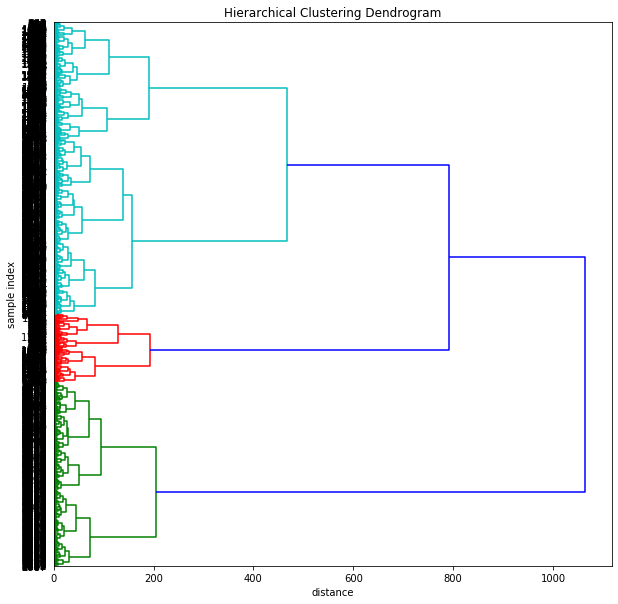

In [ ]:
Z_ward = linkage(df_raw_x, method="ward", metric="euclidean")

Z_average = linkage(df_raw_x, method="average", metric="euclidean")

Z_Minkowski = linkage(df_raw_x, method="average", metric="minkowski")

plt.figure(figsize=(10,10))
ax = plt.subplot(111)

dendrogram(Z_ward, leaf_font_size=10, orientation= "right")
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

In [ ]:
cluster_hierarchical = fcluster(Z = Z_ward, t=5, criterion="distance")

df_raw["ClusterHierarchical"] = cluster_hierarchical

df_raw.head()

,customer_id,gender,age_group,married,kids_under12,area,scribe_total,movie_watched_no_dup,repeat_mov,ClusterHierarchical
0,C5001,1,5,1,0,2,38,40,15,591
1,C5002,0,2,0,0,1,17,17,6,418
2,C5003,1,3,1,1,3,35,40,15,589
3,C5004,1,2,1,0,3,29,32,9,647
4,C5005,1,3,1,0,6,21,30,4,348


In [ ]:
df_raw.to_csv('movie_customer_fixed3.csv', header= True, index= False)

In [ ]:
ds_summary_hc = df_raw.groupby("ClusterHierarchical").agg(["mean"])

level0 = ds_summary_hc.columns.get_level_values(0)
level1 = ds_summary_hc.columns.get_level_values(1)

ds_summary_hc.columns = level0 + "_" + level1
ds_summary_hc.reset_index(inplace=True)
ds_summary_hc.round(3)

,ClusterHierarchical,gender_mean,age_group_mean,married_mean,kids_under12_mean,area_mean,scribe_total_mean,movie_watched_no_dup_mean,repeat_mov_mean
0,1,0.286,2.286,0.429,0.000,8.286,5.000,6.000,1.000
1,2,1.000,3.250,0.000,0.000,6.500,5.000,6.750,0.750
2,3,0.250,4.750,0.000,0.000,9.500,4.500,6.500,0.750
3,4,0.222,2.556,0.222,0.000,9.333,4.222,4.889,0.222
4,5,0.222,4.667,0.333,0.000,4.222,4.778,5.667,0.556
...,...,...,...,...,...,...,...,...,...
700,701,0.500,4.333,1.000,0.333,2.333,30.500,28.667,13.667
701,702,0.667,3.333,1.000,1.000,1.333,30.667,27.333,18.667
702,703,0.200,4.000,1.000,0.400,1.400,31.200,30.400,17.800
703,704,0.222,2.222,0.222,0.000,1.778,30.222,30.778,16.333


In [ ]:
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []

for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus)
    clus.fit(df_raw_x)
    
    clus_error.append(clus.inertia_)
    
ds_error = pd.DataFrame({"NumverofCluster": cluster_range, "Error":clus_error})
ds_error

,NumverofCluster,Error
0,1,1.193752e+06
1,2,4.742761e+05
2,3,2.696503e+05
3,4,1.910533e+05
4,5,1.647589e+05
5,6,1.405549e+05
6,7,1.290126e+05
7,8,1.201461e+05
8,9,1.115568e+05
9,10,1.033453e+05


Text(0, 0.5, 'Sum of squared distance')

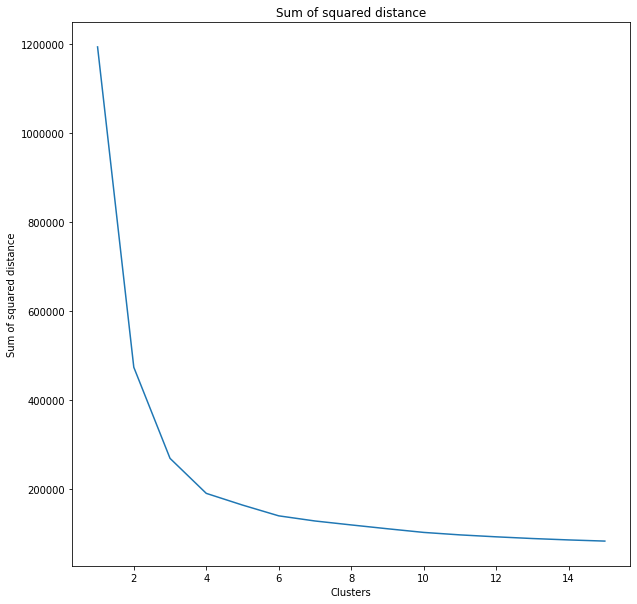

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(ds_error["NumverofCluster"], ds_error["Error"])
plt.title("Sum of squared distance")
plt.xlabel("Clusters")
plt.ylabel("Sum of squared distance")
         

In [ ]:
clus = KMeans(5)
clus.fit(df_raw_x)
cluster_kmeans = [i+1 for i in clus.labels_]
df_raw["ClusterKmeans"] = cluster_kmeans
df_raw.head()

,customer_id,gender,age_group,married,kids_under12,area,scribe_total,movie_watched_no_dup,repeat_mov,ClusterHierarchical,ClusterKmeans
0,C5001,1,5,1,0,2,38,40,15,591,1
1,C5002,0,2,0,0,1,17,17,6,418,2
2,C5003,1,3,1,1,3,35,40,15,589,1
3,C5004,1,2,1,0,3,29,32,9,647,1
4,C5005,1,3,1,0,6,21,30,4,348,2


In [ ]:
ds_summary_km = df_raw.drop("ClusterHierarchical", axis=1, inplace=False).groupby("ClusterKmeans").agg(["min", "mean", "max"])

level0 = ds_summary_km.columns.get_level_values(0)
level1 = ds_summary_km.columns.get_level_values(1)

ds_summary_km.columns = level0 + "_" + level1
ds_summary_km.reset_index(inplace=True)
ds_summary_km.round(3)

,ClusterKmeans,gender_min,gender_mean,gender_max,age_group_min,age_group_mean,age_group_max,married_min,married_mean,married_max,...,area_max,scribe_total_min,scribe_total_mean,scribe_total_max,movie_watched_no_dup_min,movie_watched_no_dup_mean,movie_watched_no_dup_max,repeat_mov_min,repeat_mov_mean,repeat_mov_max
0,1,0,0.465,1,1,3.369,6,0,0.699,1,...,10,20,29.704,38,23,33.502,46,3,14.439,23
1,2,0,0.537,1,1,3.334,6,0,0.621,1,...,10,12,20.108,29,12,23.576,34,0,7.261,20
2,3,0,0.498,1,1,3.312,6,0,0.639,1,...,10,31,39.498,45,26,41.044,54,29,42.400,62
3,4,0,0.457,1,1,3.249,6,0,0.555,1,...,10,2,9.662,17,4,12.004,20,0,2.010,11
4,5,0,0.620,1,1,3.398,6,0,0.824,1,...,10,25,32.020,42,20,32.692,48,23,31.452,46


In [ ]:
dbscan = DBSCAN(eps=1.4, min_samples=2).fit(df_raw_x)

cluster_dbscan = dbscan.labels_

for(i, val) in enumerate(cluster_dbscan):
    if val < 0:
        cluster_dbscan[i] = 0
    else:
        cluster_dbscan[i] = cluster_dbscan[i]+1
df_raw["ClusterDBScan"] = cluster_dbscan
df_raw.head()

,customer_id,gender,age_group,married,kids_under12,area,scribe_total,movie_watched_no_dup,repeat_mov,ClusterHierarchical,ClusterKmeans,ClusterDBScan
0,C5001,1,5,1,0,2,38,40,15,591,1,0
1,C5002,0,2,0,0,1,17,17,6,418,2,0
2,C5003,1,3,1,1,3,35,40,15,589,1,0
3,C5004,1,2,1,0,3,29,32,9,647,1,0
4,C5005,1,3,1,0,6,21,30,4,348,2,0


In [ ]:
ds_summary_db = df_raw.drop(["ClusterHierarchical","ClusterKmeans"], axis=1, inplace=False). groupby("ClusterDBScan").agg(["min","mean","max"])

level0 = ds_summary_db.columns.get_level_values(0)
level1 = ds_summary_db.columns.get_level_values(1)

ds_summary_db.columns = level0 + "_" + level1
ds_summary_db.reset_index(inplace=True)
ds_summary_db.round(3)

,ClusterDBScan,gender_min,gender_mean,gender_max,age_group_min,age_group_mean,age_group_max,married_min,married_mean,married_max,...,area_max,scribe_total_min,scribe_total_mean,scribe_total_max,movie_watched_no_dup_min,movie_watched_no_dup_mean,movie_watched_no_dup_max,repeat_mov_min,repeat_mov_mean,repeat_mov_max
0,0,0,0.512,1,1,3.344,6,0,0.649,1,...,10,2,22.064,45,4,24.834,54,0,12.623,62
1,1,0,0.000,0,3,3.000,3,1,1.000,1,...,7,23,23.000,23,24,24.000,24,9,9.000,9
2,2,0,0.000,0,4,4.500,5,1,1.000,1,...,6,26,26.000,26,33,33.000,33,9,9.000,9
3,3,1,1.000,1,5,5.000,5,1,1.000,1,...,10,23,23.000,23,23,23.000,23,9,9.000,9
4,4,0,0.000,0,3,3.000,3,1,1.000,1,...,1,31,31.500,32,33,33.000,33,25,25.000,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,136,1,1.000,1,4,4.000,4,1,1.000,1,...,6,7,7.000,7,8,8.000,8,0,0.000,0
137,137,0,0.000,0,5,5.000,5,1,1.000,1,...,2,6,6.500,7,8,8.000,8,2,2.000,2
138,138,1,1.000,1,4,4.500,5,1,1.000,1,...,2,6,6.000,6,9,9.000,9,1,1.000,1
139,139,1,1.000,1,5,5.000,5,1,1.000,1,...,3,7,7.500,8,10,10.000,10,0,0.000,0


In [ ]:
df_fin = df_raw.drop("ClusterDBScan", axis=1)

In [ ]:
df_fin.to_csv('cluster2_data.csv', header= True, index= False)

# 군집분석 후 데이터


In [ ]:
mov_cust = pd.read_csv("movie_customer_fixed2.csv", engine='python')

In [ ]:
mov_cust

,customer_id,gender,age,age_group,married,kids_under12,area,subs_start_year,movie_watched,movie_watched_no_dup,scribe_total,repeat_mov,ClusterHierarchical,ClusterKmeans
0,C5001,F,51,50대,M,N,용산구,2015,55,40,38,15,591,1
1,C5002,M,22,20대,S,N,강남구,2015,23,17,17,6,418,4
2,C5003,F,33,30대,M,Y,서대문구,2015,55,40,35,15,589,1
3,C5004,F,24,20대,M,N,서대문구,2015,41,32,29,9,647,1
4,C5005,F,35,30대,M,N,마포구,2015,34,30,21,4,348,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,C8273,F,43,40대,M,N,마포구,2018,8,8,7,0,13,2
3273,C8274,F,24,20대,M,N,송파구,2018,10,10,7,0,48,2
3274,C8275,F,55,50대,S,N,강남구,2018,9,7,5,2,37,2
3275,C8276,F,36,30대,S,Y,서대문구,2018,17,12,9,5,82,2


In [ ]:
mov_cust.groupby(["ClusterKmeans"]).mean()

,age,subs_start_year,movie_watched,movie_watched_no_dup,scribe_total,repeat_mov,ClusterHierarchical
ClusterKmeans,,,,,,,
1,38.074751,2015.229236,47.940199,33.501661,29.704319,14.438538,591.360465
2,36.928711,2017.509766,14.013672,12.003906,9.662109,2.009766,69.634766
3,38.494220,2015.595376,64.118497,32.684971,32.008671,31.433526,341.202312
4,37.741583,2016.176524,30.837125,23.575978,20.108280,7.261146,405.665150
5,37.101942,2015.024272,83.393204,41.014563,39.480583,42.378641,259.305825


## 군집분석 변수: age_group, married, kids_under12, area, scribe_total, movie_watched_no_dup, repeat_mov

In [ ]:
mov_cust["ClusterKmeans"].value_counts()

4    1099
2    1024
1     602
3     346
5     206
Name: ClusterKmeans, dtype: int64

# 군집 정보까지 추가된 dataset 만들기

In [ ]:
mov_cust = pd.read_csv("movie_customer.csv", engine='python', encoding="cp949")
mov_cust1 = pd.read_csv("custmov_watched.csv", engine='python', encoding="cp949")
mov_cust2 = pd.read_csv("customer_subscribe.csv", engine='python', encoding="cp949")

In [ ]:
mov_cust['movie_watched'] = list(mov_cust1.count())

In [ ]:
mov_cust3 = pd.read_csv("custmov_watched_no_dup.csv", engine='python', encoding="cp949")

In [ ]:
mov_cust['movie_watched_no_dup'] = list(mov_cust3.count())

In [ ]:
mov_cust['scribe_total'] = list(mov_cust2.count())

In [ ]:
mov_cust['repeat_mov'] = df_raw["repeat_mov"]

In [ ]:
mov_cust["ClusterHierarchical"] = df_fin["ClusterHierarchical"]

mov_cust["ClusterKmeans"] = df_fin["ClusterKmeans"]

In [ ]:
mov_cust.to_csv('movie_customer_fixed2.csv', header= True, index= False)

# 협력 필터링 알고리즘

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import pylab as pl
import math as mt
import time

In [ ]:
import numpy as np
from scipy.sparse.linalg import svds
import pandas


# 추천 시스템 모델에 기반한 아이템 비교 분석 클래스
class item_similarity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.cooccurence_matrix = None
        self.movies_dict = None
        self.rev_movies_dict = None
        self.item_similarity_recommendations = None
    
    # 유저의 아이템(영화 데이터) 가져오기
    #Get unique items (movie) corresponding to a given user
    def get_user_items(self, user):
        user_data = self.train_data[self.train_data[self.user_id] == user]
        user_items = list(user_data[self.item_id].unique())
        
        return user_items
    
    
    # 주어진 아이템으로 특정 유저 반환
    #Get unique users for a given item (song)
    def get_item_users(self, item):
        item_data = self.train_data[self.train_data[self.item_id] == item]
        item_users = set(item_data[self.user_id].unique())
            
        return item_users
    
    
    #Get unique items (movies) in the training data
    def get_all_items_train_data(self):
        all_items = list(self.train_data[self.item_id].unique())
            
        return all_items
        
    #Construct cooccurence matrix
    def construct_cooccurence_matrix(self, user_movies, all_movies):
            
        ####################################
        #Get users for all movies in user_movies.
        ####################################
        user_movies_users = []        
        for i in range(0, len(user_movies)):
            user_movies_users.append(self.get_item_users(user_movies[i]))
            
        ###############################################
        #Initialize the item cooccurence matrix of size 
        #len(user_movies) X len(songs)
        ###############################################
        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_movies), len(all_movies))), float)
           
        #############################################################
        #Calculate similarity between user movies and all unique movies
        #in the training data
        #############################################################
        for i in range(0,len(all_movies)):
            #Calculate unique listeners (users) of song (item) i
            movies_i_data = self.train_data[self.train_data[self.item_id] == all_movies[i]]
            users_i = set(movies_i_data[self.user_id].unique())
            
            for j in range(0,len(user_movies)):       
                    
                #Get unique listeners (users) of song (item) j
                users_j = user_movies_users[j]
                    
                #Calculate intersection of listeners of songs i and j
                users_intersection = users_i.intersection(users_j)
                
                #Calculate cooccurence_matrix[i,j] as Jaccard Index
                if len(users_intersection) != 0:
                    #Calculate union of listeners of songs i and j
                    users_union = users_i.union(users_j)
                    
                    cooccurence_matrix[j,i] = float(len(users_intersection))/float(len(users_union))
                else:
                    cooccurence_matrix[j,i] = 0
                    
        
        return cooccurence_matrix

    #Use the cooccurence matrix to make top recommendations
    def generate_top_recommendations(self, user, cooccurence_matrix, all_movies, user_movies):
        #print("Non zero values in cooccurence_matrix :%d" % np.count_nonzero(cooccurence_matrix))
        
        #Calculate a weighted average of the scores in cooccurence matrix for all user songs.
        user_sim_scores = cooccurence_matrix.sum(axis=0)/float(cooccurence_matrix.shape[0])
        user_sim_scores = np.array(user_sim_scores)[0].tolist()
 
        #Sort the indices of user_sim_scores based upon their value
        #Also maintain the corresponding score
        sort_index = sorted(((e,i) for i,e in enumerate(list(user_sim_scores))), reverse=True)
    
        #Create a dataframe from the following
        columns = ['user_id', 'movie', 'score', 'rank']
        #index = np.arange(1) # array of numbers for the number of samples
        df = pandas.DataFrame(columns=columns)
         
        #Fill the dataframe with top 10 item based recommendations
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_movies[sort_index[i][1]] not in user_movies and rank <= 10:
                df.loc[len(df)]=[user,all_movies[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1
        
        #Handle the case where there are no recommendations
        if df.shape[0] == 0:
            print("The current user has no movie for training the item similarity based recommendation model.")
            return -1
        else:
            return df
 
    #Create the item similarity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

    #Use the item similarity based recommender system model to
    #make recommendations
    def recommend(self, user):
        
        ########################################
        #A. Get all unique songs for this user
        ########################################
        user_movies = self.get_user_items(user)    
            
        #print("No. of unique songs for the user: %d" % len(user_movies))
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_movies = self.get_all_items_train_data()
        
        #print("no. of unique songs in the training set: %d" % len(all_movies))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_movies, all_movies)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_movies, user_movies)
                
        return df_recommendations
    
    #Get similar items to given items
    def get_similar_items(self, item_list):
        
        user_songs = item_list
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_movies = self.get_all_items_train_data()
        
        #print("no. of unique songs in the training set: %d" % len(all_movies))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_movies)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        user = ""
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_movies, user_movies)
         
        return df_recommendations

In [ ]:
ratings_metadata_file = 'has_movie6.csv'
ratings_df =  pd.read_csv(ratings_metadata_file)
ratings_df.head()

,userId,movieId,rating,votes,income_ww,release_year,ClusteringID
0,C5001,I-1038,5.068766,584383,130000000,2013,0
1,C5001,I-1003,4.792342,346171,180000000,2005,0
2,C5001,I-1017,5.639930,369965,200000000,2009,0
3,C5001,I-1028,5.742226,371113,195000000,2011,0
4,C5001,I-1036,3.522338,351169,76000000,2013,0


In [ ]:
# Cluster 0, 3 (40대)에 가중치 2.5 부여
ratings_df['rating'].where((ratings_df['movieId']!='I-1020') | (ratings_df['ClusteringID']!=0)&(ratings_df['ClusteringID']!=3),ratings_df['rating']+2.5)
ratings_df['rating'].where((ratings_df['movieId']!='I-1022') | (ratings_df['ClusteringID']!=0)&(ratings_df['ClusteringID']!=3),ratings_df['rating']+2.5)
ratings_df['rating'].where((ratings_df['movieId']!='I-1019') | (ratings_df['ClusteringID']!=0)&(ratings_df['ClusteringID']!=3),ratings_df['rating']+2.5)
ratings_df['rating'].where((ratings_df['movieId']!='I-1021') | (ratings_df['ClusteringID']!=0)&(ratings_df['ClusteringID']!=3),ratings_df['rating']+2.5)
ratings_df['rating'].where((ratings_df['movieId']!='I-1016') | (ratings_df['ClusteringID']!=0)&(ratings_df['ClusteringID']!=3),ratings_df['rating']+2.5)
ratings_df['rating'].where((ratings_df['movieId']!='I-1010') | (ratings_df['ClusteringID']!=0)&(ratings_df['ClusteringID']!=3),ratings_df['rating']+2.5)
ratings_df['rating'].where((ratings_df['movieId']!='I-1048') | (ratings_df['ClusteringID']!=0)&(ratings_df['ClusteringID']!=3),ratings_df['rating']+2.5)
ratings_df['rating'].where((ratings_df['movieId']!='I-1012') | (ratings_df['ClusteringID']!=0)&(ratings_df['ClusteringID']!=3),ratings_df['rating']+2.5)


# Cluster 1, 2 (20대)에 가중치 2.5 부여
ratings_df['rating'].where((ratings_df['movieId']!='I-1048') | (ratings_df['ClusteringID']!=1)&(ratings_df['ClusteringID']!=2),ratings_df['rating']+2.5)
ratings_df['rating'].where((ratings_df['movieId']!='I-1052') | (ratings_df['ClusteringID']!=1)&(ratings_df['ClusteringID']!=2),ratings_df['rating']+2.5)
ratings_df['rating'].where((ratings_df['movieId']!='I-1068') | (ratings_df['ClusteringID']!=1)&(ratings_df['ClusteringID']!=2),ratings_df['rating']+2.5)
ratings_df['rating'].where((ratings_df['movieId']!='I-1078') | (ratings_df['ClusteringID']!=1)&(ratings_df['ClusteringID']!=2),ratings_df['rating']+2.5)
ratings_df['rating'].where((ratings_df['movieId']!='I-1057') | (ratings_df['ClusteringID']!=1)&(ratings_df['ClusteringID']!=2),ratings_df['rating']+2.5)
ratings_df['rating'].where((ratings_df['movieId']!='I-1077') | (ratings_df['ClusteringID']!=1)&(ratings_df['ClusteringID']!=2),ratings_df['rating']+2.5)
ratings_df['rating'].where((ratings_df['movieId']!='I-1045') | (ratings_df['ClusteringID']!=1)&(ratings_df['ClusteringID']!=2),ratings_df['rating']+2.5)
ratings_df['rating'].where((ratings_df['movieId']!='I-1093') | (ratings_df['ClusteringID']!=1)&(ratings_df['ClusteringID']!=2),ratings_df['rating']+2.5)
ratings_df['rating'].where((ratings_df['movieId']!='I-1069') | (ratings_df['ClusteringID']!=1)&(ratings_df['ClusteringID']!=2),ratings_df['rating']+2.5)


# Cluster 4 (30대)에 가중치 2.5 부여
ratings_df['rating'].where((ratings_df['movieId']!='I-1077') | (ratings_df['ClusteringID']!=4),ratings_df['rating']+2.5)
ratings_df['rating'].where((ratings_df['movieId']!='I-1069') | (ratings_df['ClusteringID']!=4),ratings_df['rating']+2.5)
ratings_df['rating'].where((ratings_df['movieId']!='I-1058') | (ratings_df['ClusteringID']!=4),ratings_df['rating']+2.5)
ratings_df['rating'].where((ratings_df['movieId']!='I-1057') | (ratings_df['ClusteringID']!=4),ratings_df['rating']+2.5)
ratings_df['rating'].where((ratings_df['movieId']!='I-1078') | (ratings_df['ClusteringID']!=4),ratings_df['rating']+2.5)

0         5.068766
1         4.792342
2         5.639930
3         5.742226
4         3.522338
            ...   
116459    3.497894
116460    3.216442
116461    6.120936
116462    6.337142
116463    2.964672
Name: rating, Length: 116464, dtype: float64

In [ ]:
users = ratings_df['userId'].unique()

is_model = item_similarity_recommender_py()
is_model.create(ratings_df, 'userId', 'movieId')

user_id = users[3]
recom1 = is_model.recommend(user_id)
print("___________ List of recommended movies id _______________")
print("")
print(list(recom1['movie']))

___________ List of recommended movies id _______________

['I-1052', 'I-1060', 'I-1059', 'I-1010', 'I-1057', 'I-1063', 'I-1061', 'I-1064', 'I-1016', 'I-1012']


# 자연어처리를 통한 관련도 높은 영화 추천 알고리즘

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

df_meta = pd.read_csv("movie_meta.csv", engine="python", encoding="cp949")
# df_meta.head()

In [ ]:
df_meta = df_meta.fillna("")
df_meta["natlang"] = df_meta["title"] + " "  + df_meta["Genre_1"] + " " + df_meta["Genre_2"] + " " +\
df_meta["Genre_3"] + " " + df_meta["Genre_4"] + " " + df_meta["Genre_5"] + " " + df_meta["Genre_6"] + " " + \
df_meta["Genre_7"] + " " + df_meta["Genre_8"] + " " + df_meta["director"] + " " + df_meta["actor_1"] + " " + \
df_meta["description"] + " " + df_meta["storyline"]

In [ ]:
df_inven = pd.read_csv("movie_inventory.csv", engine="python", encoding="cp949")
df = pd.merge(df_inven, df_meta, on=["movie_id","title"], how="left")

In [ ]:
natlang_inven = df[["item_id", "movie_id", "title", "description", "storyline", "natlang"]]

In [ ]:
# natlang_inven.to_csv('movie_natlang.csv', header= True, ind필터링ex= False)

In [ ]:
db = df_meta[["title", "natlang"]]

In [ ]:
movie_name = input("관련도를 찾을 영화의 정확한 이름을 적어주세요: ")
print("\n\"%s\" 와/과 관련도 높은 책을 찾습니다\n" %movie_name)


tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(db['natlang'])


cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


title = movie_name
title2index = pd.Series(data=db.index, index= db['title']).drop_duplicates()
index = title2index[title]

sim_scores = list(enumerate(cosine_sim[index]))

sim_scores.sort(key=lambda x: x[1], reverse=True)
top10 = sim_scores[1:11]
top10_index = [x[0] for x in top10]
print("<<Result>>")
print(top10_index)
print(db['title'].iloc[top10_index] , "\n\n영화내용:\n" , db['natlang'].iloc[top10_index])
book = int(input("관심있는 책의 번호를 적어주세요: "))

print("\n [제목]:", db['title'].loc[book],"\n\n","[설명]:",db['natlang'].loc[book])



관련도를 찾을 영화의 정확한 이름을 적어주세요: Up

"Up" 와/과 관련도 높은 책을 찾습니다

<<Result>>
[1655, 750, 230, 647, 782, 476, 1650, 106, 378, 708]
1655                   You, Me and Dupree
750                       Meet the Blacks
230                                  Chef
647                             King Kong
782                         Monster House
476                             Greenberg
1650                              Yes Man
106                             Astro Boy
378     Extremely Loud & Incredibly Close
708                           Love, Simon
Name: title, dtype: object 

영화내용:
 1655    You, Me and Dupree Comedy Romance       Anthon...
750     Meet the Blacks Comedy Horror       Deon Taylo...
230     Chef Adventure Comedy Drama      Jon Favreau J...
647     King Kong Action Adventure Drama Romance     P...
782     Monster House Animation Adventure Comedy Famil...
476     Greenberg Comedy Drama Romance      Noah Baumb...
1650    Yes Man Comedy Romance       Peyton Reed Jim C...
106     Astro Boy 